In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

### Basic EDA

In [5]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
df.shape

(3276, 10)

In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Imbalance Data

In [12]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [14]:
print(int((round(len(df[df["Potability"]==0])/len(df),2))*100))
print(int((round(len(df[df["Potability"]==1])/len(df),2))*100))

61
39


### Missing Data

In [15]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
 df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [17]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i)

ph
Sulfate
Trihalomethanes


-------------ph---------------
Mean-7.080794504276835
Median-7.036752103833548


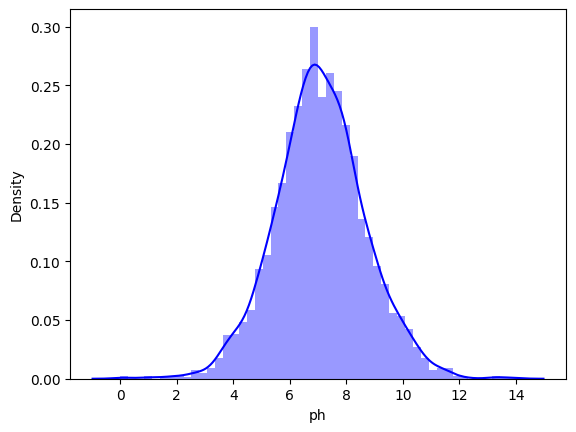

-------------Sulfate---------------
Mean-333.7757766108135
Median-333.073545745888


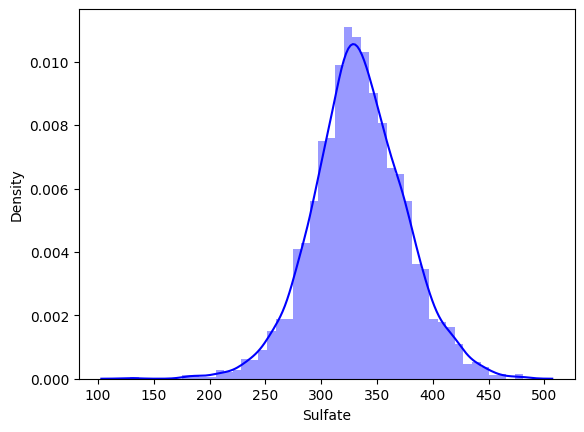

-------------Trihalomethanes---------------
Mean-66.39629294676803
Median-66.62248509808484


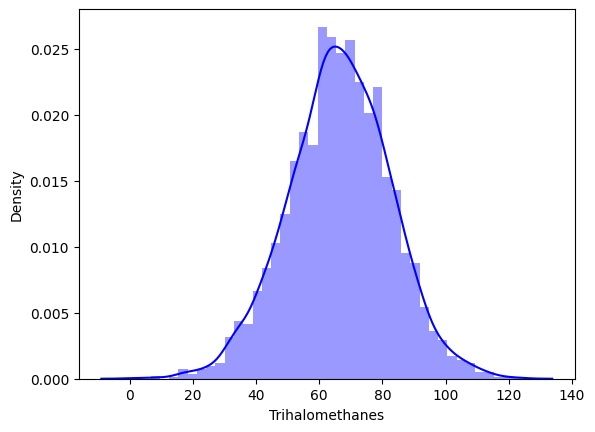

In [21]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(f"-------------{i}---------------")
        print(f"Mean-{df[i].mean()}")
        print(f"Median-{df[i].median()}")
        sns.distplot(df[i],color='b')
        plt.show()

In [24]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(f"{i}-->{df[i].mean()}")

ph-->7.080794504276835
Sulfate-->333.7757766108135
Trihalomethanes-->66.39629294676803


In [25]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i].fillna(df[i].mean(),inplace=True)

In [28]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Duplicate Data

In [29]:
df.duplicated().sum()

0

In [30]:
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


### Outliers and Anomalies

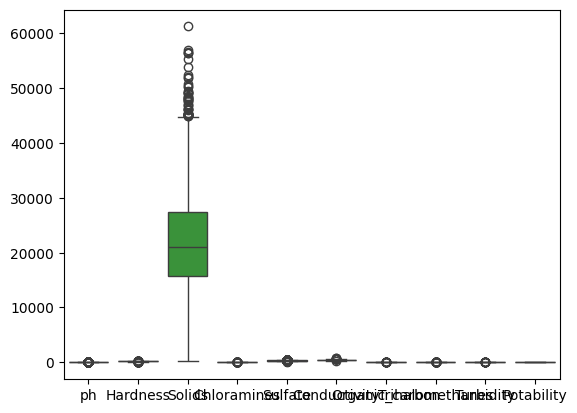

In [32]:
sns.boxplot(df)
plt.show()

--------------{i}----------------


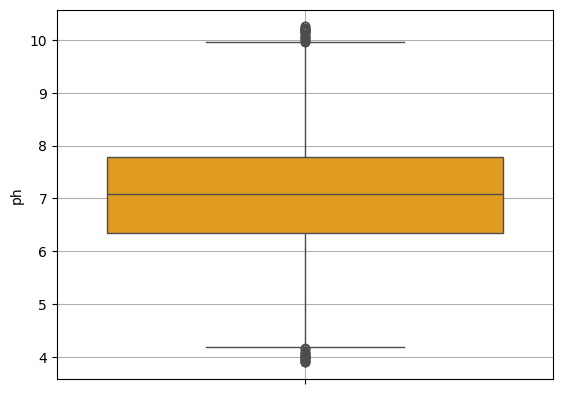

--------------{i}----------------


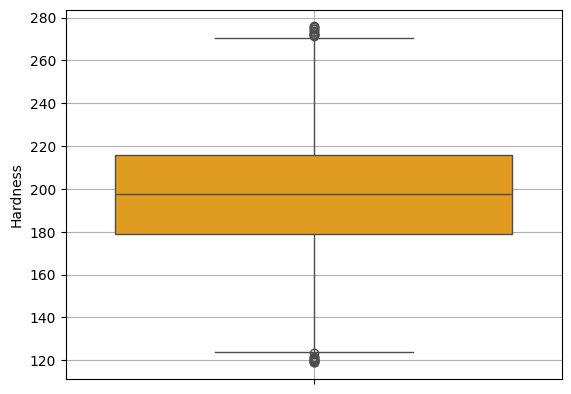

--------------{i}----------------


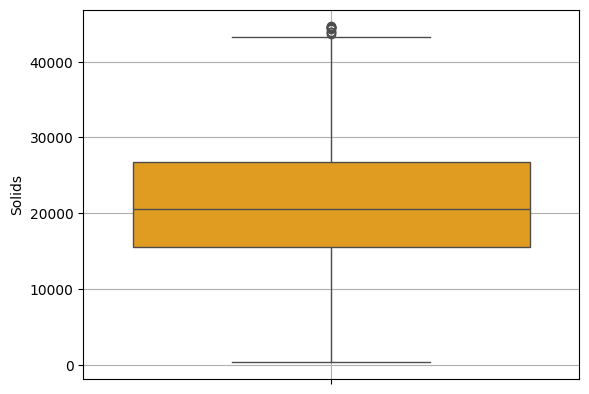

--------------{i}----------------


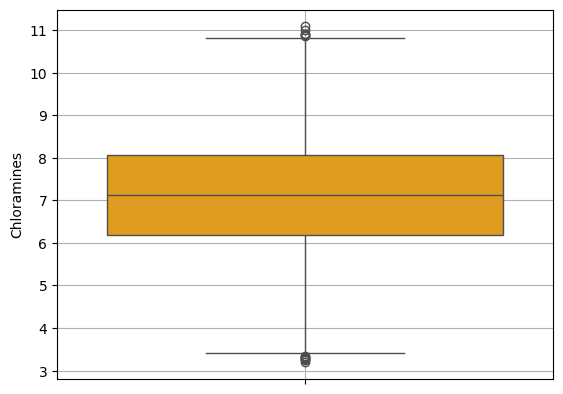

--------------{i}----------------


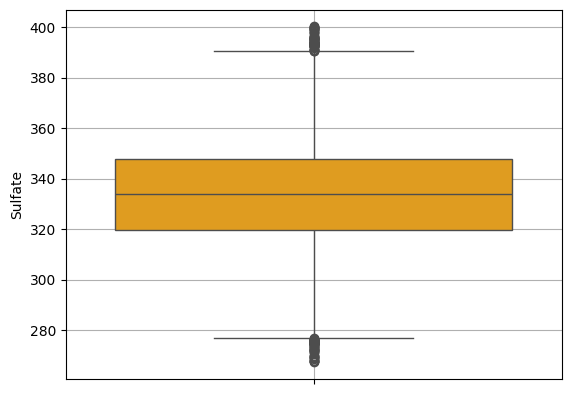

--------------{i}----------------


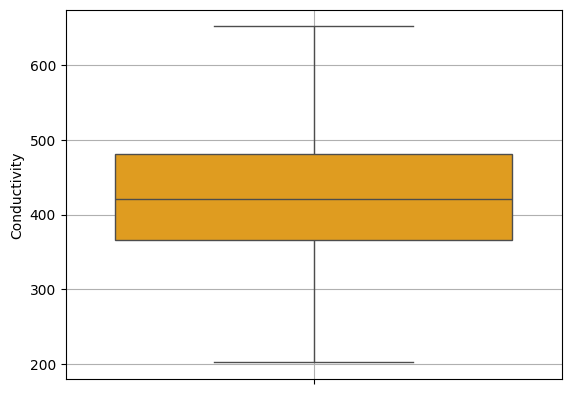

--------------{i}----------------


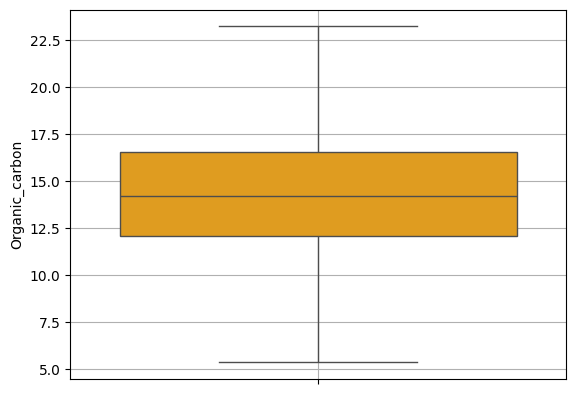

--------------{i}----------------


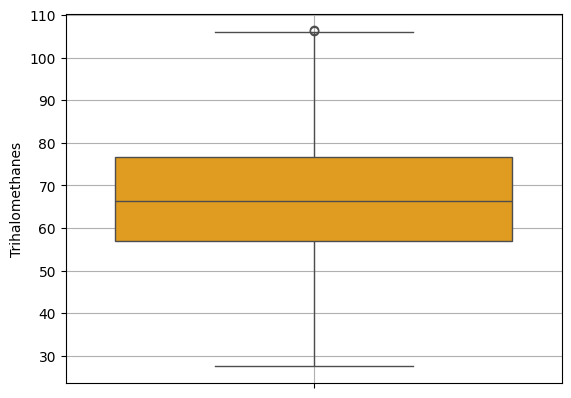

--------------{i}----------------


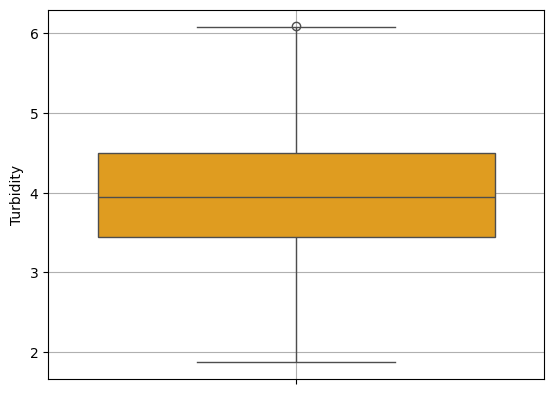

In [89]:
for i in df.columns:
    if i=="Potability":
        pass
    else:
        print("--------------{i}----------------")
        sns.boxplot(df[i],color='orange')
        plt.grid()
        plt.show()

### Using IQR Removing outliers

In [36]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(f"IQR: \n {IQR}")

IQR: 
 ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [42]:
#Define Upper and Lower bound for Outliers
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(f"Lower bound for outliers: \n \n{lower_bound}\n \n")
print(f"Upper bound for outliers: \n \n {upper_bound}")

Lower bound for outliers: 
 
ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64
 

Upper bound for outliers: 
 
 ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64


In [52]:
df=df[~((df<lower_bound)|(df>upper_bound)).any(axis=1)]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


### Feature Selection

In [53]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.131362,-0.087036,-0.062888,0.016894,0.001943,0.026160,0.009172,-0.043034,-0.005949
Hardness,0.131362,1.000000,-0.045552,-0.035832,-0.027939,-0.030415,0.012463,-0.007093,-0.022362,-0.000710
Solids,-0.087036,-0.045552,1.000000,-0.040392,-0.110090,0.007087,0.026793,-0.024550,0.022801,0.005600
Chloramines,-0.062888,-0.035832,-0.040392,1.000000,0.024502,-0.015277,-0.000684,0.016574,-0.005415,0.013195
Sulfate,0.016894,-0.027939,-0.110090,0.024502,1.000000,-0.005850,-0.007588,-0.022269,-0.017310,-0.003741
Conductivity,0.001943,-0.030415,0.007087,-0.015277,-0.005850,1.000000,0.006515,-0.001138,0.007674,-0.001886
Organic_carbon,0.026160,0.012463,0.026793,-0.000684,-0.007588,0.006515,1.000000,-0.000059,-0.016705,-0.027090
Trihalomethanes,0.009172,-0.007093,-0.024550,0.016574,-0.022269,-0.001138,-0.000059,1.000000,-0.024269,0.014351
Turbidity,-0.043034,-0.022362,0.022801,-0.005415,-0.017310,0.007674,-0.016705,-0.024269,1.000000,0.004761
Potability,-0.005949,-0.000710,0.005600,0.013195,-0.003741,-0.001886,-0.027090,0.014351,0.004761,1.000000


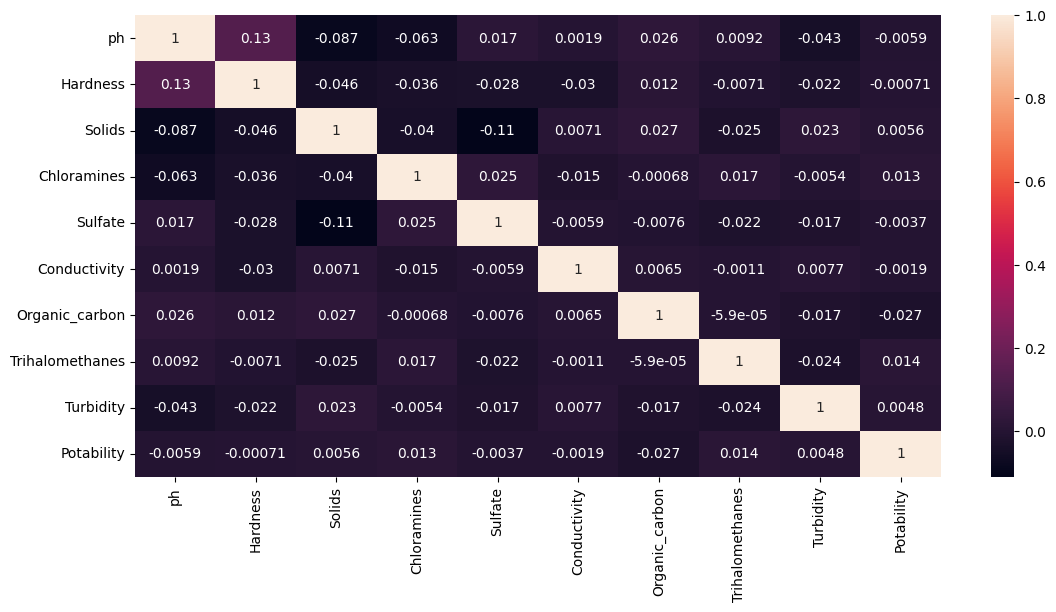

In [54]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [55]:
df.corr()["Potability"]

ph                -0.005949
Hardness          -0.000710
Solids             0.005600
Chloramines        0.013195
Sulfate           -0.003741
Conductivity      -0.001886
Organic_carbon    -0.027090
Trihalomethanes    0.014351
Turbidity          0.004761
Potability         1.000000
Name: Potability, dtype: float64

### Model Building

#### Seperate Independent and Dependent Data

In [56]:
x=df.drop(columns=["Potability"],axis=1)
y=df["Potability"]

#### Split your data into Train and Test

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [61]:
x_train[:3]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2271,8.388322,256.234007,16795.820484,4.143519,333.775777,333.946197,10.821321,55.190219,3.854772
2748,4.951414,153.212150,20117.359061,8.985572,391.069045,418.330195,11.831691,68.387613,3.870681
3106,7.080795,156.773181,23084.066585,7.269795,334.956100,378.253869,19.247141,81.571554,5.564902


In [62]:
x_test[:3]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2553,8.037761,199.213971,40368.420627,7.307411,333.775777,293.833466,14.254682,68.763418,3.572519
2347,5.429335,183.439383,15265.407564,5.714731,394.001195,446.879149,17.581557,50.266951,3.081736
605,6.492639,172.863960,14625.561363,7.736570,349.404057,652.537592,10.212058,56.949724,4.667770


In [60]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [64]:
print(x_train_sc[:3])

[[ 1.08790956  2.09056478 -0.59647931 -2.11725361  0.0057017  -1.14401174
  -1.05584236 -0.76370666 -0.13696497]
 [-1.74032936 -1.54115475 -0.18021947  1.32458752  2.16592356 -0.09042397
  -0.74586468  0.12902908 -0.11598472]
 [ 0.0119423  -1.41562152  0.19157245  0.10497432  0.05020535 -0.59080233
   1.52916801  1.0208548   2.11818687]]


In [65]:
print(x_test_sc[:3])

[[ 0.76955275  0.0591837   2.49249786  0.16686874 -0.0200319  -1.67231573
  -0.07283378  0.16249225 -0.52065935]
 [-1.37679259 -0.49759241 -0.77389725 -0.94127021  2.26052272  0.25304875
   1.02418171 -1.04356868 -1.15747579]
 [-0.50185216 -0.87086    -0.85715381  0.46546445  0.57176386  2.84029886
  -1.40586274 -0.60781891  0.9004857 ]]


### Model Selection

#### a)Logistic Regression

In [66]:
lr=LogisticRegression()
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [67]:
print(f"Training Accuracy: {round(lr.score(x_train_sc,y_train),2)*100} %")
print(f"Testing Accuracy: {round(lr.score(x_test_sc,y_test),2)*100} %")

Training Accuracy: 62.0 %
Testing Accuracy: 64.0 %


#### b) Decision Tree

In [68]:
dtree=DecisionTreeClassifier(max_depth=5)
dtree.fit(x_train_sc,y_train)

DecisionTreeClassifier(max_depth=5)

In [69]:
print(f"Training Accuracy: {round(dtree.score(x_train_sc,y_train),2)*100} %")
print(f"Testing Accuracy: {round(dtree.score(x_test_sc,y_test),2)*100} %")

Training Accuracy: 70.0 %
Testing Accuracy: 63.0 %


#### c)Gradient Boosting Classifier

In [72]:
gb=GradientBoostingClassifier()
gb.fit(x_train_sc,y_train)

GradientBoostingClassifier()

In [73]:
print(f"Training Accuracy: {round(gb.score(x_train_sc,y_train),2)*100} %")
print(f"Testing Accuracy: {round(gb.score(x_test_sc,y_test),2)*100} %")

Training Accuracy: 75.0 %
Testing Accuracy: 64.0 %


### Model Training - Gradient Boosting

In [74]:
gb=GradientBoostingClassifier()
gb.fit(x_train_sc,y_train)

GradientBoostingClassifier()

### Model Prediction

In [75]:
y_pred_train=gb.predict(x_train_sc)
y_pred_test=gb.predict(x_test_sc)

### Model Evaluation

In [76]:
#Training Data
confusion_matrix(y_train,y_pred_train)

array([[1300,   29],
       [ 501,  302]], dtype=int64)

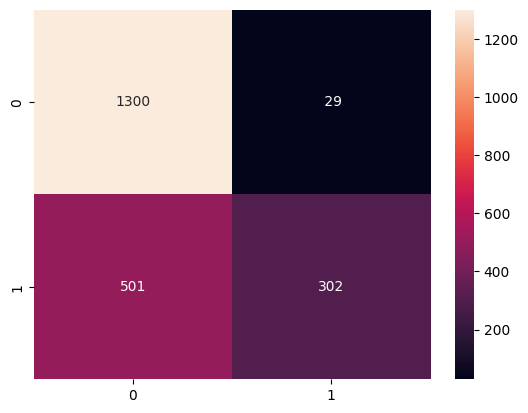

In [81]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt="3g")
plt.show()

In [82]:
accuracy_score(y_train,y_pred_train)

0.7514071294559099

In [83]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1329
           1       0.91      0.38      0.53       803

    accuracy                           0.75      2132
   macro avg       0.82      0.68      0.68      2132
weighted avg       0.79      0.75      0.72      2132



In [84]:
# Test Data
confusion_matrix(y_test,y_pred_test)

array([[308,  34],
       [158,  34]], dtype=int64)

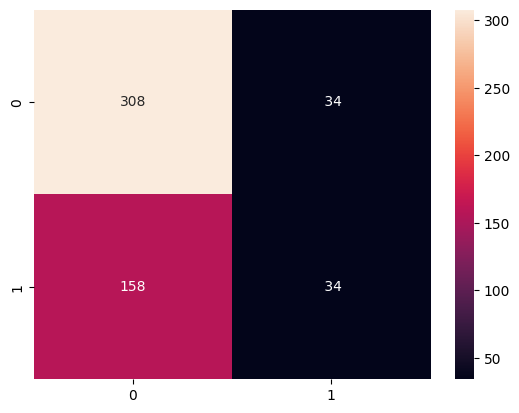

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt="3g")
plt.show()

In [85]:
accuracy_score(y_test,y_pred_test)

0.6404494382022472

In [87]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       342
           1       0.50      0.18      0.26       192

    accuracy                           0.64       534
   macro avg       0.58      0.54      0.51       534
weighted avg       0.60      0.64      0.58       534

